<a href="https://colab.research.google.com/github/NroyAnalyst/Nishant/blob/main/Regularized_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
#regularized linear regression using gradient descent


In [12]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy as it is used in the function

#regularized linear regression using gradient descent

def regularized_linear_regression(X, y, learning_rate=0.01, iterations=1000, lambda_reg=0.1):
  #Get number of sample and number of features
  m,n = X.shape

  #Add a column ones to X for the bias term (intercept)
  X=np.c_[np.ones((m,1)),X]

  #Initialize parameters (theta) to zeros (including bias)
  theta=np.zeros((n+1,1))

  #Ensure y is a column vector
  y=y.reshape(-1,1)

  #to store cost at each iteration for visualization
  cost_history = []
# Perform Gradient Descent
  for i in range(iterations): # Corrected the variable name to iterations
 # Compute predictions: h = X * theta
    predictions = X.dot(theta)

 # Compute error between predictions and actual y
    errors = predictions - y
 # Compute gradient for all parameters
    gradient = (1/m) * (X.T.dot(errors))

 # Add regularization term to gradient (excluding bias term theta[0])
    gradient[1:] += (lambda_reg/m) * theta[1:]

 # Update parameters using gradient descent rule
    theta -= learning_rate * gradient

 # Compute cost function with L2 regularization (Ridge)
    cost = (1/(2*m)) * np.sum(errors ** 2) + (lambda_reg/(2*m)) * np.sum(theta[1:] ** 2)

 # Save the cost for plotting later
    cost_history.append(cost)
  return theta, cost_history

Theta: [[4.09737438]
 [2.8601306 ]]


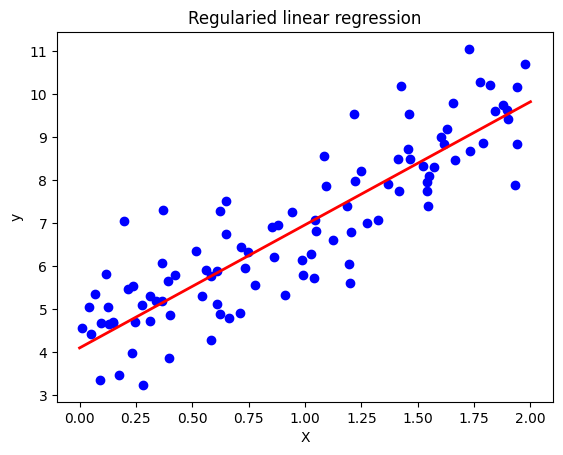

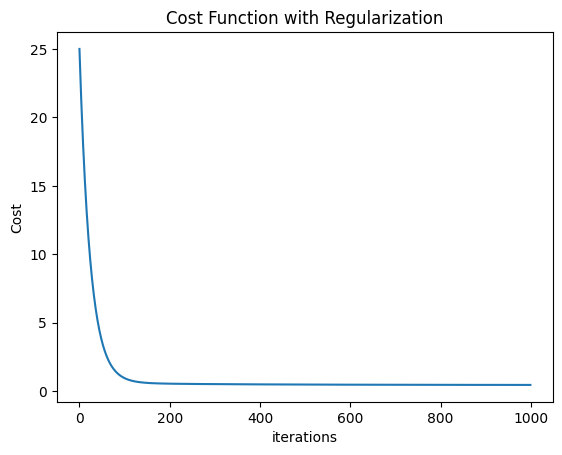

In [14]:
#generate sys=nthetic data(y=4+3x+noise)
np.random.seed(42) #for reproducibility

X= 2*np.random.rand(100,1) #random value of X
y= 4+3*X+np.random.randn(100,1) #generate y with some noise

#Train the model
theta,cost_history = regularized_linear_regression(X,y,learning_rate=0.01,iterations=1000,lambda_reg=1)

#Prepare new X values for predictions (X=0 and X=2)
X_new = np.array([[0],[2]])
X_new_bias=np.c_[np.ones((2,1)),X_new] #Add bias
y_pred=X_new_bias.dot(theta) #predicted value

#Print learned parameter
print("Theta:",theta)

#visualization
#plot original data points and the fitted regression line
plt.scatter(X,y,color='blue',label="Data Points")
plt.plot(X_new,y_pred,color='red',linewidth=2,label="regularized fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regularied linear regression")
plt.show()

#plot the cost function to show convergence over iterations
plt.plot(cost_history)
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.title("Cost Function with Regularization")
plt.show()